# A DIALOGUE between HAL and ME

In [1]:
from HAL.literate import Library

In [2]:
theka = 'hitchhikers_guide'
topic = 'city'
question = 'hello'


library = Library.from_library_folder(theka)
answers = library.ask(topic, question, print_answers=True)

Number of answers: 5 
-------------


ADAMS, The Restaurant At The End Of The World:
		‘Oh, hello there,’ he said to them.
---



ADAMS, The Hitchikers Guide To The Galaxy:
		Of all the races in all the Galaxy who could have come and said a big hello to planet Earth, he thought, didn’t it just have to be the Vogons.
---



ADAMS, The Hitchikers Guide To The Galaxy:
		and news reports brought to you here on the sub etha waveband, broadcasting around the Galaxy around the clock,’ squawked a voice, ‘and we’ll be saying a big hello to all intelligent life forms everywhere...
---



ADAMS, The Hitchikers Guide To The Galaxy:
		‘Why hello there!’ they said (ticker tape, ticker tape).
---



ADAMS, Mostly Harmless:
		‘No, I mean, that sounded like someone I knew.’ ‘Princess Hooli? If I had to stand around saying hello to everybody who’s known Princess Hooli I’d need a new set of lungs.’ ‘Not the Princess,’ said Arthur.
---





ask somethink to HAL 

he will anwer

with a cacophony of voices

c:\Users\computer-1\Desktop\HAL\HAL\metrika\graph.py:86: RuntimeWarning: invalid value encountered in scalar divide
  angle = math.atan(dy/dx)


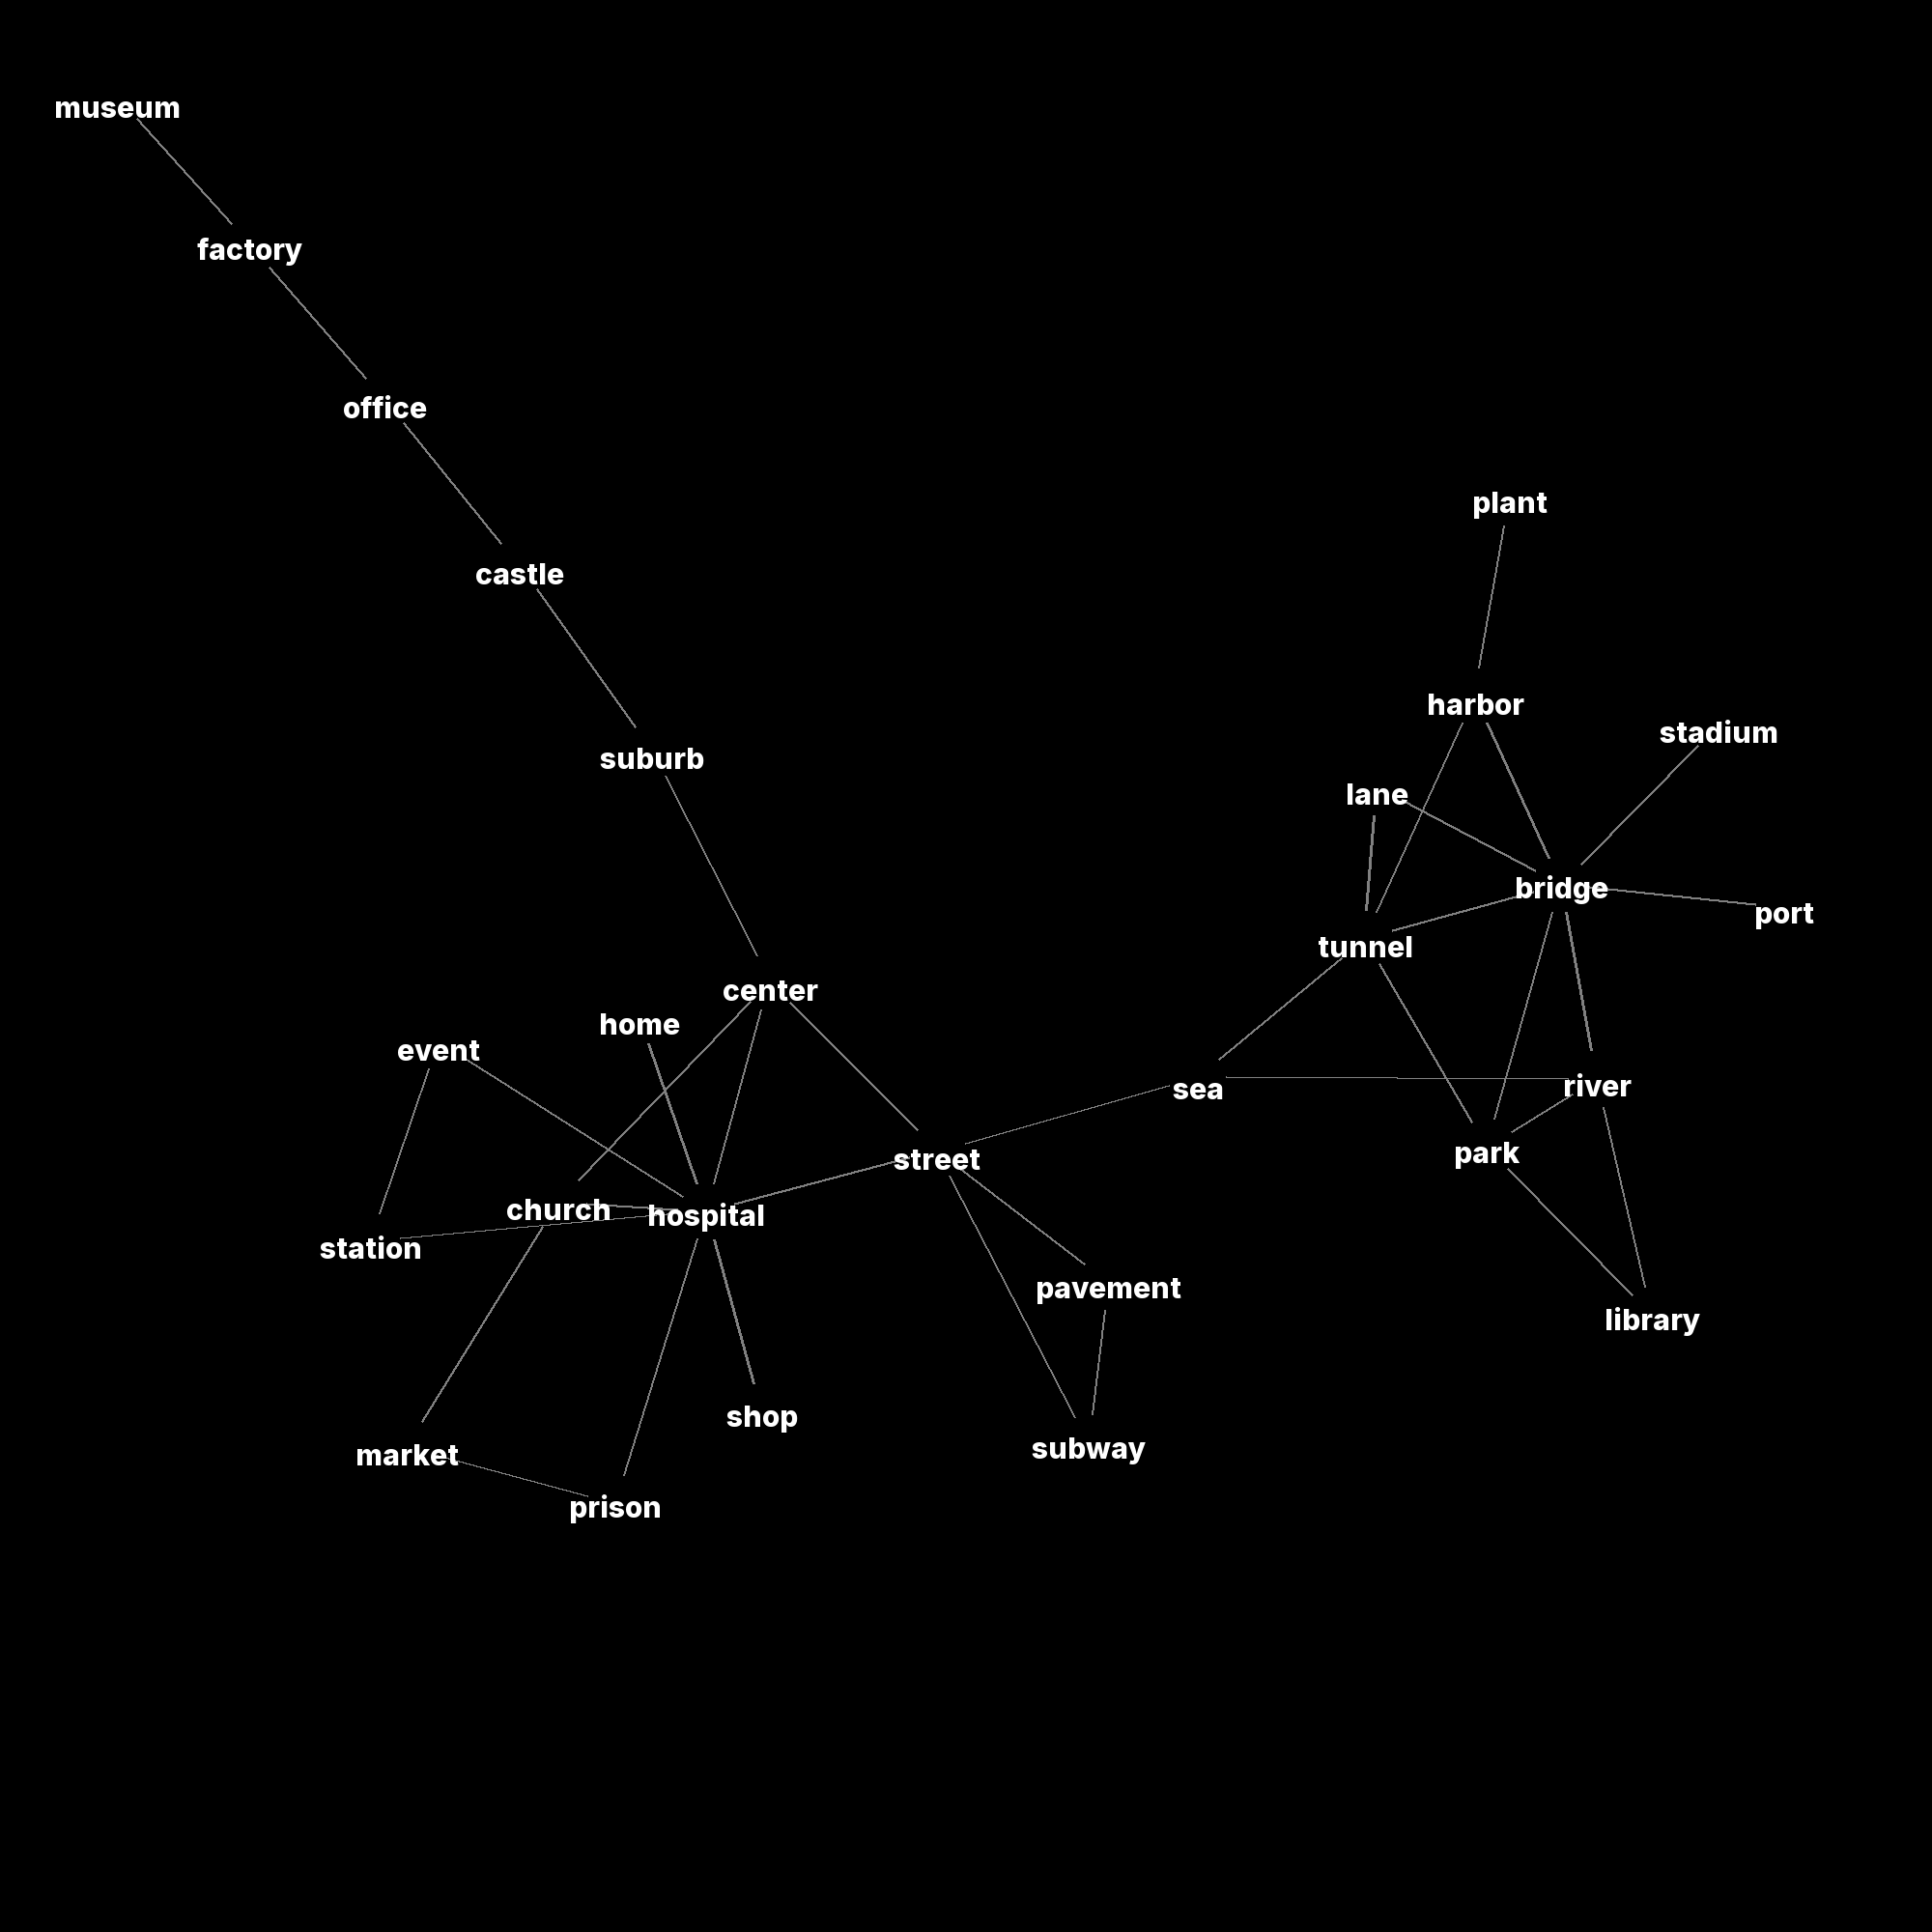

In [3]:
from HAL.literate import *
from HAL.pixels import Color
from HAL.metrika import Graph



def get_connections_of_a_question(question):

    theka = 'urbotheka'
    topic = question


    library = Library.from_library_folder(theka)
    answers = library.ask(topic,  question, print_answers=False);


    quotebook = Quotebook(answers)
    text, footnotes, title = quotebook.build_text(create_title=True, n=30)

    narrative = filter_by_places(text)
    narrative = clean_whitespaces(narrative)
    connections = get_connection_of_word(narrative)

    return connections



questions = ['aqueduct', 'hospital', 'bridge', 'red', 'life', 'source', 'water']


connectivity = Rule([])

for q in questions:
    conn = get_connections_of_a_question(q)
    connectivity.merge(conn)


g = Graph()
g.build_graph_from_rules(connectivity)

eigen_centrality = nx.eigenvector_centrality(g.graph)

for node1, node2 in g.graph.edges():
    centrality_value = (eigen_centrality[node1] + eigen_centrality[node2]) / 2
    g.add_edge_attribute(node1, node2, 'eigen', centrality_value)


g.draw(show_nodes=False, label_color=Color.WHITE, edge_color=Color.GRAY, label_size=30, edge_direction=False, graph_type="KAMADA-KAWAI", spectral_weight='eigen')



From a text to a connection of words, they form a network of connections